In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
from scipy.stats import linregress

# Import API key
from api_keys import weatherKey

from citipy import citipy

output_data_file = "output_data/cities.csv"

#lat and lng ranges
latRange = (-90,90)
lngRange = (-180,180)

# Generating cities list

In [5]:
#list for latituide and longituide for the cities
latLng=[]
cities = []

#create random lat and lng combinations
lats = np.random.uniform(latRange[0],latRange[1],size=1500)
lngs = np.random.uniform(lngRange[0],lngRange[1],size=1500)
lat_lngs = zip(lats, lngs)

#identify nearst city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #if the city is unique, then add it to list
    if city not in cities:
        cities.append(city)
        

#check length of list       
print(f"The amount of unique cities found was:{len(cities)}")

The amount of unique cities found was:609


# API calls

In [22]:
# lat, lng, max temp, humidity, cloudiness, wind speed, country, date
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weatherKey +"&units=imperial" "&q="

#Set up lists for dataframe
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []
citiesFound = []
citiesNotFound = []
record = 1
setC = 1

print("Start of data retrival \n")

#loop will retrieve data from PAI and append to lists
for city in cities:
    weatherResponse = requests.get(query_url + city).json()
    print(f"Processing Record {record} of Set {setC} // {city}")
    
    #slow API 5 seconds after every 60 rercords
    if record < 60:
        try:
            citiesFound.append(weatherResponse['name'])            
            lat.append(weatherResponse['coord']['lat'])
            lng.append(weatherResponse['coord']['lon'])
            maxTemp.append(weatherResponse['main']['temp_max'])
            humidity.append(weatherResponse['main']['humidity'])
            cloudiness.append(weatherResponse['clouds']['all'])
            windSpeed.append(weatherResponse['wind']['speed'])
            country.append(weatherResponse['sys']['country'])
            date.append(weatherResponse['dt'])
        except:
            print(f"City '{city}' not found, skipped")
            citiesNotFound.append(city)
            
        record+=1
    else:
        time.sleep(5)
        record = 1
        setC+=1
        
print(f"Data retrieval finished\n{len(citiesFound)} was the number of cities found while {len(citiesNotFound)} did not have any data")

Start of data retrival 

Processing Record 1 of Set 1 // ushuaia
Processing Record 2 of Set 1 // arraial do cabo
Processing Record 3 of Set 1 // orlik
Processing Record 4 of Set 1 // mataura
Processing Record 5 of Set 1 // chapada dos guimaraes
Processing Record 6 of Set 1 // esperance
Processing Record 7 of Set 1 // barrow
Processing Record 8 of Set 1 // rio grande
Processing Record 9 of Set 1 // tezu
Processing Record 10 of Set 1 // rikitea
Processing Record 11 of Set 1 // dikson
Processing Record 12 of Set 1 // batagay-alyta
Processing Record 13 of Set 1 // batemans bay
Processing Record 14 of Set 1 // bagotville
Processing Record 15 of Set 1 // tigil
Processing Record 16 of Set 1 // valleyview
Processing Record 17 of Set 1 // hasaki
Processing Record 18 of Set 1 // airai
Processing Record 19 of Set 1 // punta arenas
Processing Record 20 of Set 1 // acari
Processing Record 21 of Set 1 // dzaoudzi
Processing Record 22 of Set 1 // port alfred
Processing Record 23 of Set 1 // genoa
Pro

Processing Record 7 of Set 4 // shingu
Processing Record 8 of Set 4 // pitimbu
Processing Record 9 of Set 4 // kruisfontein
Processing Record 10 of Set 4 // georgetown
Processing Record 11 of Set 4 // shakawe
Processing Record 12 of Set 4 // centralia
Processing Record 13 of Set 4 // el juncal
Processing Record 14 of Set 4 // cidreira
Processing Record 15 of Set 4 // tabas
Processing Record 16 of Set 4 // severo-kurilsk
Processing Record 17 of Set 4 // bathsheba
Processing Record 18 of Set 4 // amahai
Processing Record 19 of Set 4 // faanui
Processing Record 20 of Set 4 // meiganga
Processing Record 21 of Set 4 // mistelbach
Processing Record 22 of Set 4 // palabuhanratu
City 'palabuhanratu' not found, skipped
Processing Record 23 of Set 4 // scarborough
Processing Record 24 of Set 4 // novosil
Processing Record 25 of Set 4 // salalah
Processing Record 26 of Set 4 // cape town
Processing Record 27 of Set 4 // moville
Processing Record 28 of Set 4 // puerto ayora
Processing Record 29 of

Processing Record 3 of Set 7 // saint-leu
Processing Record 4 of Set 7 // encheng
Processing Record 5 of Set 7 // luderitz
Processing Record 6 of Set 7 // vincennes
Processing Record 7 of Set 7 // tarandacuao
Processing Record 8 of Set 7 // slave lake
Processing Record 9 of Set 7 // tombouctou
Processing Record 10 of Set 7 // alta floresta
Processing Record 11 of Set 7 // bogdanovich
Processing Record 12 of Set 7 // mandalgovi
Processing Record 13 of Set 7 // pabrade
Processing Record 14 of Set 7 // presidencia roque saenz pena
Processing Record 15 of Set 7 // bocanda
Processing Record 16 of Set 7 // codajas
Processing Record 17 of Set 7 // vaitupu
City 'vaitupu' not found, skipped
Processing Record 18 of Set 7 // sibolga
Processing Record 19 of Set 7 // alofi
Processing Record 20 of Set 7 // punta de bombon
Processing Record 21 of Set 7 // naze
Processing Record 22 of Set 7 // san angelo
Processing Record 23 of Set 7 // miyako
Processing Record 24 of Set 7 // san policarpo
Processing 

Processing Record 9 of Set 10 // port keats
Processing Record 10 of Set 10 // mapimi
Processing Record 11 of Set 10 // cascais
Processing Record 12 of Set 10 // umm lajj
Processing Record 13 of Set 10 // belaya gora
Processing Record 14 of Set 10 // great falls
Processing Record 15 of Set 10 // trincomalee
Processing Record 16 of Set 10 // malinovskiy
Processing Record 17 of Set 10 // alotau
City 'alotau' not found, skipped
Processing Record 18 of Set 10 // katete
Processing Record 19 of Set 10 // marica
Processing Record 20 of Set 10 // arlit
Processing Record 21 of Set 10 // jingdezhen
Processing Record 22 of Set 10 // lufilufi
Processing Record 23 of Set 10 // jalu
Processing Record 24 of Set 10 // fort nelson
Processing Record 25 of Set 10 // kovur
Processing Record 26 of Set 10 // nyamati
Processing Record 27 of Set 10 // svetlogorsk
Processing Record 28 of Set 10 // burnie
Processing Record 29 of Set 10 // kasongo-lunda
Processing Record 30 of Set 10 // harper
Processing Record 3

# Building the DataFrames

In [23]:
cityData = pd.DataFrame({
    "City": citiesFound,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windSpeed,
    "Country": country,
    "Date": date
})
cityData.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.82,64,20,6.91,AR,1658868434
1,Arraial do Cabo,-22.9661,-42.0278,73.36,78,0,14.97,BR,1658868253
2,Orlik,52.5178,99.8250,42.64,84,68,0.72,RU,1658868434
3,Mataura,-46.1927,168.8643,44.47,97,100,7.02,NZ,1658868435
4,Chapada dos Guimarães,-15.4606,-55.7497,87.46,22,5,2.98,BR,1658868435
5,Esperance,-33.8667,121.9000,56.79,80,100,5.64,AU,1658868435
6,Barrow,71.2906,-156.7887,35.62,93,100,17.27,US,1658868436
7,Rio Grande,-32.0350,-52.0986,68.11,93,67,9.24,BR,1658868290
8,Tezu,27.9167,96.1667,73.62,94,79,3.11,IN,1658868436
9,Rikitea,-23.1203,-134.9692,75.34,74,83,12.82,PF,1658868437


In [24]:
#save the DF to a csv file for Vacationpy
cityData.to_csv(output_data_file, encoding='utf-8')

In [25]:
#calculate and display stats 
cityStats = cityData.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
cityStatsCon = cityData[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].quantile([.25, .5, .75])
cityStats = pd.concat([cityStats,cityStatsCon])
cityStats.set_axis(['count', 'mean', 'std', 'min', 'max', '25%', '50%', '75%'], axis='index', inplace=True)
cityStats

C:\Users\world\AppData\Local\Temp\ipykernel_708\980248259.py:2: FutureWarning: ['City', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cityStats = cityData.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.668177,16.753060,69.608333,71.521978,53.721612,7.593553,1.658868e+09
std,33.421665,91.533722,14.493971,21.242688,40.310166,5.130527,1.075440e+02
min,-54.800000,-179.166700,29.750000,8.000000,0.000000,0.000000,1.658868e+09
max,78.218600,178.416700,105.330000,100.000000,100.000000,31.270000,1.658869e+09
25%,-7.178700,-63.566725,58.985000,59.500000,7.000000,3.792500,1.658868e+09
50%,25.115050,19.575600,71.905000,77.000000,65.000000,6.510000,1.658869e+09
75%,49.428625,100.207800,79.540000,88.000000,96.000000,10.082500,1.658869e+09


# Clean up the data

In [26]:
#drop rows where humidity is higher than 100
cleanData = cityData[cityData['Humidity'] <= 100]

#Recalculates and displays stats after any rows are dropped
cleanCityStats = cleanData.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
cleanCityStats2 = cleanData[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].quantile([.25, .5, .75])
cleanCityStats = pd.concat([cleanCityStats, cleanCityStats2])
cleanCityStats.set_axis(['count', 'mean', 'std', 'min', 'max', '25%', '50%', '75%'], axis='index', inplace=True)
cleanCityStats

C:\Users\world\AppData\Local\Temp\ipykernel_708\1837835799.py:5: FutureWarning: ['City', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cleanCityStats = cleanData.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.668177,16.753060,69.608333,71.521978,53.721612,7.593553,1.658868e+09
std,33.421665,91.533722,14.493971,21.242688,40.310166,5.130527,1.075440e+02
min,-54.800000,-179.166700,29.750000,8.000000,0.000000,0.000000,1.658868e+09
max,78.218600,178.416700,105.330000,100.000000,100.000000,31.270000,1.658869e+09
25%,-7.178700,-63.566725,58.985000,59.500000,7.000000,3.792500,1.658868e+09
50%,25.115050,19.575600,71.905000,77.000000,65.000000,6.510000,1.658869e+09
75%,49.428625,100.207800,79.540000,88.000000,96.000000,10.082500,1.658869e+09


# Plots

*lat v temp*

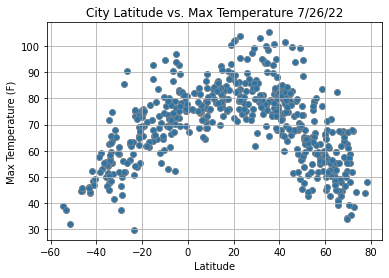

In [27]:
#city latitude v max temperature
plt.scatter(cleanData['Lat'],cleanData['Max Temp'], marker ="o", edgecolors="gray")
plt.title("City Latitude vs. Max Temperature 7/26/22")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsMaxTemp.png")

plt.show()

The above plot demonstrates that cities that are closer to the Equator (Latitude 0) the higher the citie's max temperature is

# Lat vs humidity

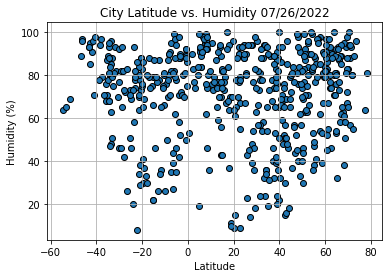

In [30]:
# City Latitude vs Humidity (07/24/2022)
plt.scatter(cleanData['Lat'], cleanData['Humidity'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Humidity 07/26/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsHumidity.png")

plt.show()

This plot demonstrates the relationship with latitude on the earth with the citie's humidity%. There seems to be a small correlation between lower humidity percentages if the city is closer to the equator.

# Lat vs. Cloudiness

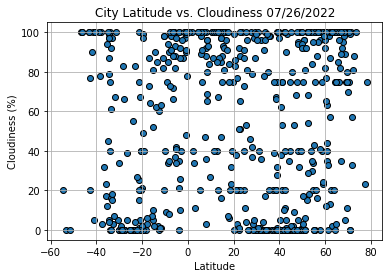

In [33]:
# City Latitude vs Cloudiness (07/24/2022)
plt.scatter(cleanData['Lat'], cleanData['Cloudiness'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Cloudiness 07/26/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsCloudiness.png")

plt.show()

The above plot demonstrates the latitude of a city vs how cloudy it is in that city. There does not appear to have any correlation between the latitude and the cloudiness

# Lat vs. Wind speed

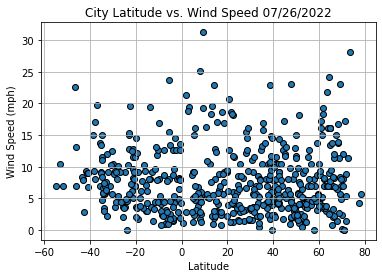

In [35]:
# City Latitude vs Wind Speed (07/24/2022)
plt.scatter(cleanData['Lat'], cleanData['Wind Speed'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Wind Speed 07/26/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsWindSpeed.png")

plt.show()


The above plot does not seem to have a strong correlation between latitude and windspeed. A large majority of cities do not have windspeeds above 15mph

# Linear Regression

In [37]:
#split the city weather data between N and S for linear regression computations.
southHemi = cleanData[cleanData['Lat']<0]
northHemi = cleanData[cleanData['Lat']>0]
print(f"The number of cities in the northern hemisphere: {len(northHemi)}.\nThe number of cities in the southern hemisphere: {len(southHemi)}.")

The number of cities in the northern hemisphere: 373.
The number of cities in the southern hemisphere: 173.


## North Hemisphere - Max Temp vs. Latitude Linear Regression 

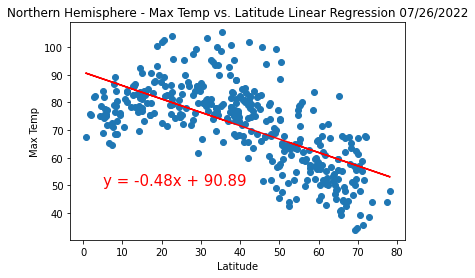

The r-value is: -0.6556973899497388


In [42]:
xValues = northHemi['Lat']
yValues = northHemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (5,50), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression 07/26/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Images/NorthHemiCityLatitudeVsMaxTempRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The northern hemishpere's latitude v max temp plot demonstrates a strong negative r-value correlation. The furthuer north a city is from the Equator, the more likely it will have a lower Max Temp

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

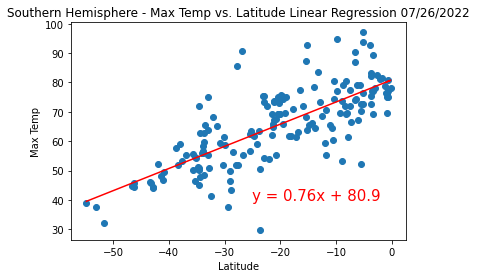

The r-value is: 0.7491473272375636


In [48]:
xValues = southHemi['Lat']
yValues = southHemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-25,40), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression 07/26/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Images/SouthHemiCityLatitudeVsMaxTempRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The southern hemishpere's latitude v max temp plot demonstrates a strong positive r-value correlation. again, the same conclusion can be made with this plot, saying the closer a city is to the equator the higher the Max Temp will be, and the same can be said of saying the furthuer a city is from the southern equator, the more likely it will have a lower max temp.

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

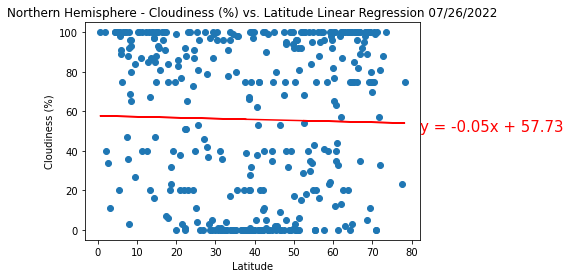

The r-value is: -0.02291529277738295


In [92]:
xValues = northHemi['Lat']
yValues = northHemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (82.2253455,50), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 07/26/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/NorthHemiCityLatitudeVsCloudinessRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot no relationship between cloudiness percentage and city latitude in the northern hemisphere.

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

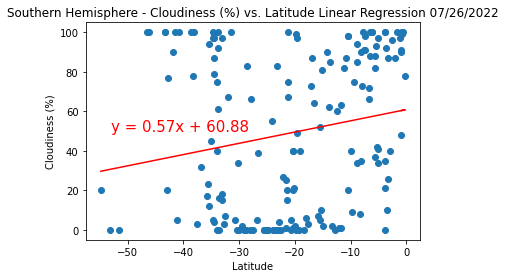

The r-value is: 0.18921871722315803


In [96]:
xValues = southHemi['Lat']
yValues = southHemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-53,50), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 07/26/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/SouthHemiCityLatitudeVsCloudinessRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot shows a r value of .18 showing a slightly positive correlation between a cities latitude with how cloudy it will probably be, but the r value is too low to make a confident conclusion

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

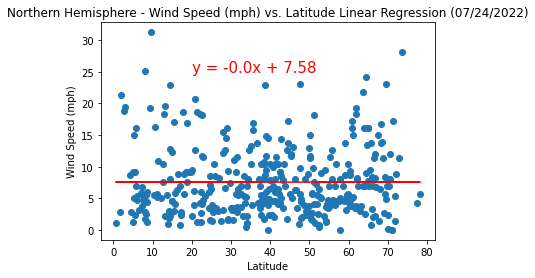

The r-value is: -0.0015246972270791636


In [99]:
xValues = northHemi['Lat']
yValues = northHemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (20,25), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/NorthHemiCityLatitudeVsWindSpeedRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows no correlation between latitude and windspeed in a city 

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

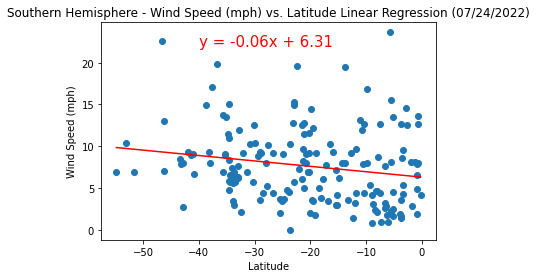

The r-value is: -0.19269387012985895


In [112]:
xValues = southHemi['Lat']
yValues = southHemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-40,22), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/SouthHemiCityLatitudeVsWindSpeedRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a slightly negative correlation between latitude and wind speed, meaning the furthuer away you are south of the Equator, there is a small chance that there is higher windspeeds than being closer to the northern equator